In [1]:
# topic: Relating physical activity to problematic internet use
# objective: predict sii using physical activity fitness data (via classification)
# important features include - Parent-Child Internet Addiction Test (PCIAT).

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report

In [4]:
# import training dataset
train_df = pd.read_csv('train.csv')
train_df

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [7]:
# import test dataset
test_df = pd.read_csv('test.csv')
test_df

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# data exploration

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      20 non-null     object 
 1   Basic_Demos-Enroll_Season               20 non-null     object 
 2   Basic_Demos-Age                         20 non-null     int64  
 3   Basic_Demos-Sex                         20 non-null     int64  
 4   CGAS-Season                             10 non-null     object 
 5   CGAS-CGAS_Score                         8 non-null      float64
 6   Physical-Season                         14 non-null     object 
 7   Physical-BMI                            13 non-null     float64
 8   Physical-Height                         13 non-null     float64
 9   Physical-Weight                         13 non-null     float64
 10  Physical-Waist_Circumference            5 non-null      float64


In [15]:
train_df.shape

(3960, 82)

In [17]:
test_df.shape

(20, 59)

In [19]:
# get column names
print(train_df.columns.values)

['id' 'Basic_Demos-Enroll_Season' 'Basic_Demos-Age' 'Basic_Demos-Sex'
 'CGAS-Season' 'CGAS-CGAS_Score' 'Physical-Season' 'Physical-BMI'
 'Physical-Height' 'Physical-Weight' 'Physical-Waist_Circumference'
 'Physical-Diastolic_BP' 'Physical-HeartRate' 'Physical-Systolic_BP'
 'Fitness_Endurance-Season' 'Fitness_Endurance-Max_Stage'
 'Fitness_Endurance-Time_Mins' 'Fitness_Endurance-Time_Sec' 'FGC-Season'
 'FGC-FGC_CU' 'FGC-FGC_CU_Zone' 'FGC-FGC_GSND' 'FGC-FGC_GSND_Zone'
 'FGC-FGC_GSD' 'FGC-FGC_GSD_Zone' 'FGC-FGC_PU' 'FGC-FGC_PU_Zone'
 'FGC-FGC_SRL' 'FGC-FGC_SRL_Zone' 'FGC-FGC_SRR' 'FGC-FGC_SRR_Zone'
 'FGC-FGC_TL' 'FGC-FGC_TL_Zone' 'BIA-Season' 'BIA-BIA_Activity_Level_num'
 'BIA-BIA_BMC' 'BIA-BIA_BMI' 'BIA-BIA_BMR' 'BIA-BIA_DEE' 'BIA-BIA_ECW'
 'BIA-BIA_FFM' 'BIA-BIA_FFMI' 'BIA-BIA_FMI' 'BIA-BIA_Fat'
 'BIA-BIA_Frame_num' 'BIA-BIA_ICW' 'BIA-BIA_LDM' 'BIA-BIA_LST'
 'BIA-BIA_SMM' 'BIA-BIA_TBW' 'PAQ_A-Season' 'PAQ_A-PAQ_A_Total'
 'PAQ_C-Season' 'PAQ_C-PAQ_C_Total' 'PCIAT-Season' 'PCIAT-PCIAT_01'

In [21]:
# preview first 5 rows
train_df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# preview last 10 rows
train_df.tail(10)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
3950,ff0ab367,Spring,9,0,NaN,NaN,Spring,20.200490,52.5,79.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,0.0,NaN
3951,ff18b749,Spring,7,0,NaN,NaN,Summer,14.768842,47.5,47.4,...,0.0,0.0,0.0,0.0,Summer,62.0,85.0,Spring,0.0,0.0
3952,ff60112d,Summer,15,0,Spring,40.0,Winter,26.364710,70.5,186.4,...,1.0,1.0,1.0,35.0,Spring,66.0,90.0,Summer,3.0,1.0
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0
3959,ffef538e,Spring,11,0,NaN,NaN,Winter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,1.0,NaN


In [25]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Age,3960.0,10.433586,3.574648,5.0,8.00000,10.000000,13.000000,22.000000
Basic_Demos-Sex,3960.0,0.372727,0.483591,0.0,0.00000,0.000000,1.000000,1.000000
CGAS-CGAS_Score,2421.0,65.454771,22.341862,25.0,59.00000,65.000000,75.000000,999.000000
Physical-BMI,3022.0,19.331929,5.113934,0.0,15.86935,17.937682,21.571244,59.132048
Physical-Height,3027.0,55.946713,7.473764,33.0,50.00000,55.000000,62.000000,78.500000
...,...,...,...,...,...,...,...,...
PCIAT-PCIAT_Total,2736.0,27.896199,20.338853,0.0,12.00000,26.000000,41.000000,93.000000
SDS-SDS_Total_Raw,2609.0,41.088923,10.427433,17.0,33.00000,39.000000,46.000000,96.000000
SDS-SDS_Total_T,2606.0,57.763622,13.196091,38.0,47.00000,55.000000,64.000000,100.000000
PreInt_EduHx-computerinternet_hoursday,3301.0,1.060588,1.094875,0.0,0.00000,1.000000,2.000000,3.000000


In [27]:
# data preprocessing

In [29]:
# analyse missing data
null_data = train_df.isna().sum().sort_values(ascending = False).head(46)
null_data = pd.DataFrame(null_data)
null_data = null_data.rename(columns={0:'Missing'})
null_data.style.background_gradient(cmap='YlOrRd')

,Missing
PAQ_A-PAQ_A_Total,3485
PAQ_A-Season,3485
Fitness_Endurance-Time_Sec,3220
Fitness_Endurance-Time_Mins,3220
Fitness_Endurance-Max_Stage,3217
Physical-Waist_Circumference,3062
FGC-FGC_GSND_Zone,2898
FGC-FGC_GSD_Zone,2897
FGC-FGC_GSD,2886
FGC-FGC_GSND,2886


In [31]:
# drop id column
train_df = train_df.drop(columns='id')
test_df = test_df.drop(columns='id')

In [33]:
# check for presence of null values
print(train_df.isnull().values.any())
print(test_df.isnull().values.any())

True
True


In [35]:
# remove data in train_df with null sii
train_df = train_df.dropna(subset=['sii'])

In [37]:
# return rows where 'sii' is NaN
train_df[train_df['sii'].isnull()]

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii


In [39]:
train_df['sii'].value_counts()

0.0    1594
1.0     730
2.0     378
3.0      34
Name: sii, dtype: int64

In [41]:
train_df

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,NaN,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,25.0,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,23.0,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3957,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,NaN,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


In [43]:
train_df.shape

(2736, 81)

In [45]:
# response variable
target = train_df['sii']

In [47]:
# convert seasons into numeric encoding
# handle missing seasons data

train_df_cols = train_df.select_dtypes(exclude = 'number').columns
for season in train_df_cols:
    train_df[season] = train_df[season].fillna(0)
    train_df[season] = train_df[season].replace({'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4})

test_df_cols = test_df.select_dtypes(exclude = 'number').columns
for season in test_df_cols:
    test_df[season] = test_df[season].fillna(0)
    test_df[season] = test_df[season].replace({'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4})

In [49]:
train_df

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,3,5,0,4,51.0,3,16.877316,46.0,50.8,NaN,...,4.0,2.0,4.0,55.0,0,NaN,NaN,3,3.0,2.0
1,2,9,0,0,NaN,3,14.035590,48.0,46.0,22.0,...,0.0,0.0,0.0,0.0,3,46.0,64.0,2,0.0,0.0
2,2,10,1,3,71.0,3,16.648696,56.5,75.6,NaN,...,2.0,1.0,1.0,28.0,3,38.0,54.0,2,2.0,0.0
3,4,9,0,3,71.0,2,18.292347,56.0,81.6,NaN,...,3.0,4.0,1.0,44.0,2,31.0,45.0,4,0.0,1.0
5,1,13,1,4,50.0,2,22.279952,59.5,112.2,NaN,...,1.0,2.0,1.0,34.0,2,40.0,56.0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3,8,0,0,NaN,3,17.139810,52.5,67.2,25.0,...,2.0,2.0,1.0,22.0,3,41.0,58.0,3,2.0,0.0
3954,2,7,1,0,NaN,2,13.927006,48.5,46.6,23.0,...,3.0,3.0,0.0,33.0,2,48.0,67.0,2,0.0,1.0
3955,3,13,0,1,60.0,3,16.362460,59.5,82.4,NaN,...,1.0,1.0,0.0,32.0,4,35.0,50.0,3,1.0,1.0
3957,3,11,0,1,68.0,4,21.441500,60.0,109.8,NaN,...,1.0,0.0,1.0,31.0,4,56.0,77.0,3,0.0,1.0


In [51]:
# pick a season column
# check for presnece of null 
train_df[train_df['CGAS-Season'].isnull()]

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii


In [53]:
# mark 50% as the threshold for columns with >50% non null values
# fill in missing values

# training dataset
threshold_train = 0.5 * len(train_df)
columns_with_data_train = train_df.columns[train_df.isnull().sum() < threshold_train]
train_df = train_df[columns_with_data_train]
# replace missing values with 0
train_df = train_df.fillna(0)

# testing dataset
threshold_test = 0.5 * len(test_df)
columns_with_data_test = test_df.columns[test_df.isnull().sum() < threshold_test]
test_df = test_df[columns_with_data_test]
# replace missing values with 0
test_df = test_df.fillna(0)

In [55]:
train_df

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,3,5,0,4,51.0,3,16.877316,46.0,50.8,0.0,...,4.0,2.0,4.0,55.0,0,0.0,0.0,3,3.0,2.0
1,2,9,0,0,0.0,3,14.035590,48.0,46.0,75.0,...,0.0,0.0,0.0,0.0,3,46.0,64.0,2,0.0,0.0
2,2,10,1,3,71.0,3,16.648696,56.5,75.6,65.0,...,2.0,1.0,1.0,28.0,3,38.0,54.0,2,2.0,0.0
3,4,9,0,3,71.0,2,18.292347,56.0,81.6,60.0,...,3.0,4.0,1.0,44.0,2,31.0,45.0,4,0.0,1.0
5,1,13,1,4,50.0,2,22.279952,59.5,112.2,60.0,...,1.0,2.0,1.0,34.0,2,40.0,56.0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3,8,0,0,0.0,3,17.139810,52.5,67.2,60.0,...,2.0,2.0,1.0,22.0,3,41.0,58.0,3,2.0,0.0
3954,2,7,1,0,0.0,2,13.927006,48.5,46.6,65.0,...,3.0,3.0,0.0,33.0,2,48.0,67.0,2,0.0,1.0
3955,3,13,0,1,60.0,3,16.362460,59.5,82.4,71.0,...,1.0,1.0,0.0,32.0,4,35.0,50.0,3,1.0,1.0
3957,3,11,0,1,68.0,4,21.441500,60.0,109.8,79.0,...,1.0,0.0,1.0,31.0,4,56.0,77.0,3,0.0,1.0


In [57]:
test_df

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,...,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,PAQ_A-Season,PAQ_C-Season,SDS-Season,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,3,5,0,4,3,16.877316,46.00,50.8,0.0,0.0,...,6.0,0.0,6.0,1.0,3,0,0,0,3,3.0
1,2,9,0,0,3,14.035590,48.00,46.0,75.0,70.0,...,11.0,1.0,3.0,0.0,4,0,3,3,2,0.0
2,2,10,1,3,3,16.648696,56.50,75.6,65.0,94.0,...,10.0,1.0,5.0,0.0,0,0,2,3,2,2.0
3,4,9,0,3,2,18.292347,56.00,81.6,60.0,97.0,...,7.0,0.0,7.0,1.0,2,0,4,2,4,0.0
4,1,18,1,2,0,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2,0,0,0,0.0
5,1,13,1,4,2,22.279952,59.50,112.2,60.0,73.0,...,11.0,1.0,8.0,0.0,2,0,1,2,1,0.0
6,3,10,0,0,3,19.660760,55.00,84.6,123.0,83.0,...,11.0,1.0,11.0,1.0,3,0,4,4,3,3.0
7,3,10,1,0,3,16.861286,59.25,84.2,71.0,90.0,...,0.0,0.0,4.0,0.0,3,0,3,0,3,2.0
8,2,15,0,0,1,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,2,2.0
9,2,19,1,2,0,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0


In [59]:
# check for null values
train_df.isnull().any()

Basic_Demos-Enroll_Season                 False
Basic_Demos-Age                           False
Basic_Demos-Sex                           False
CGAS-Season                               False
CGAS-CGAS_Score                           False
                                          ...  
SDS-SDS_Total_Raw                         False
SDS-SDS_Total_T                           False
PreInt_EduHx-Season                       False
PreInt_EduHx-computerinternet_hoursday    False
sii                                       False
Length: 72, dtype: bool

In [61]:
# check for null values
test_df.isnull().any()

Basic_Demos-Enroll_Season                 False
Basic_Demos-Age                           False
Basic_Demos-Sex                           False
CGAS-Season                               False
Physical-Season                           False
Physical-BMI                              False
Physical-Height                           False
Physical-Weight                           False
Physical-Diastolic_BP                     False
Physical-HeartRate                        False
Physical-Systolic_BP                      False
Fitness_Endurance-Season                  False
FGC-Season                                False
FGC-FGC_CU                                False
FGC-FGC_CU_Zone                           False
FGC-FGC_PU                                False
FGC-FGC_PU_Zone                           False
FGC-FGC_SRL                               False
FGC-FGC_SRL_Zone                          False
FGC-FGC_SRR                               False
FGC-FGC_SRR_Zone                        

In [63]:
# check for presence of null values
print(train_df.isnull().values.any())
print(test_df.isnull().values.any())

False
False


In [65]:
# EDA - exploratory data analysis
# data visualizations

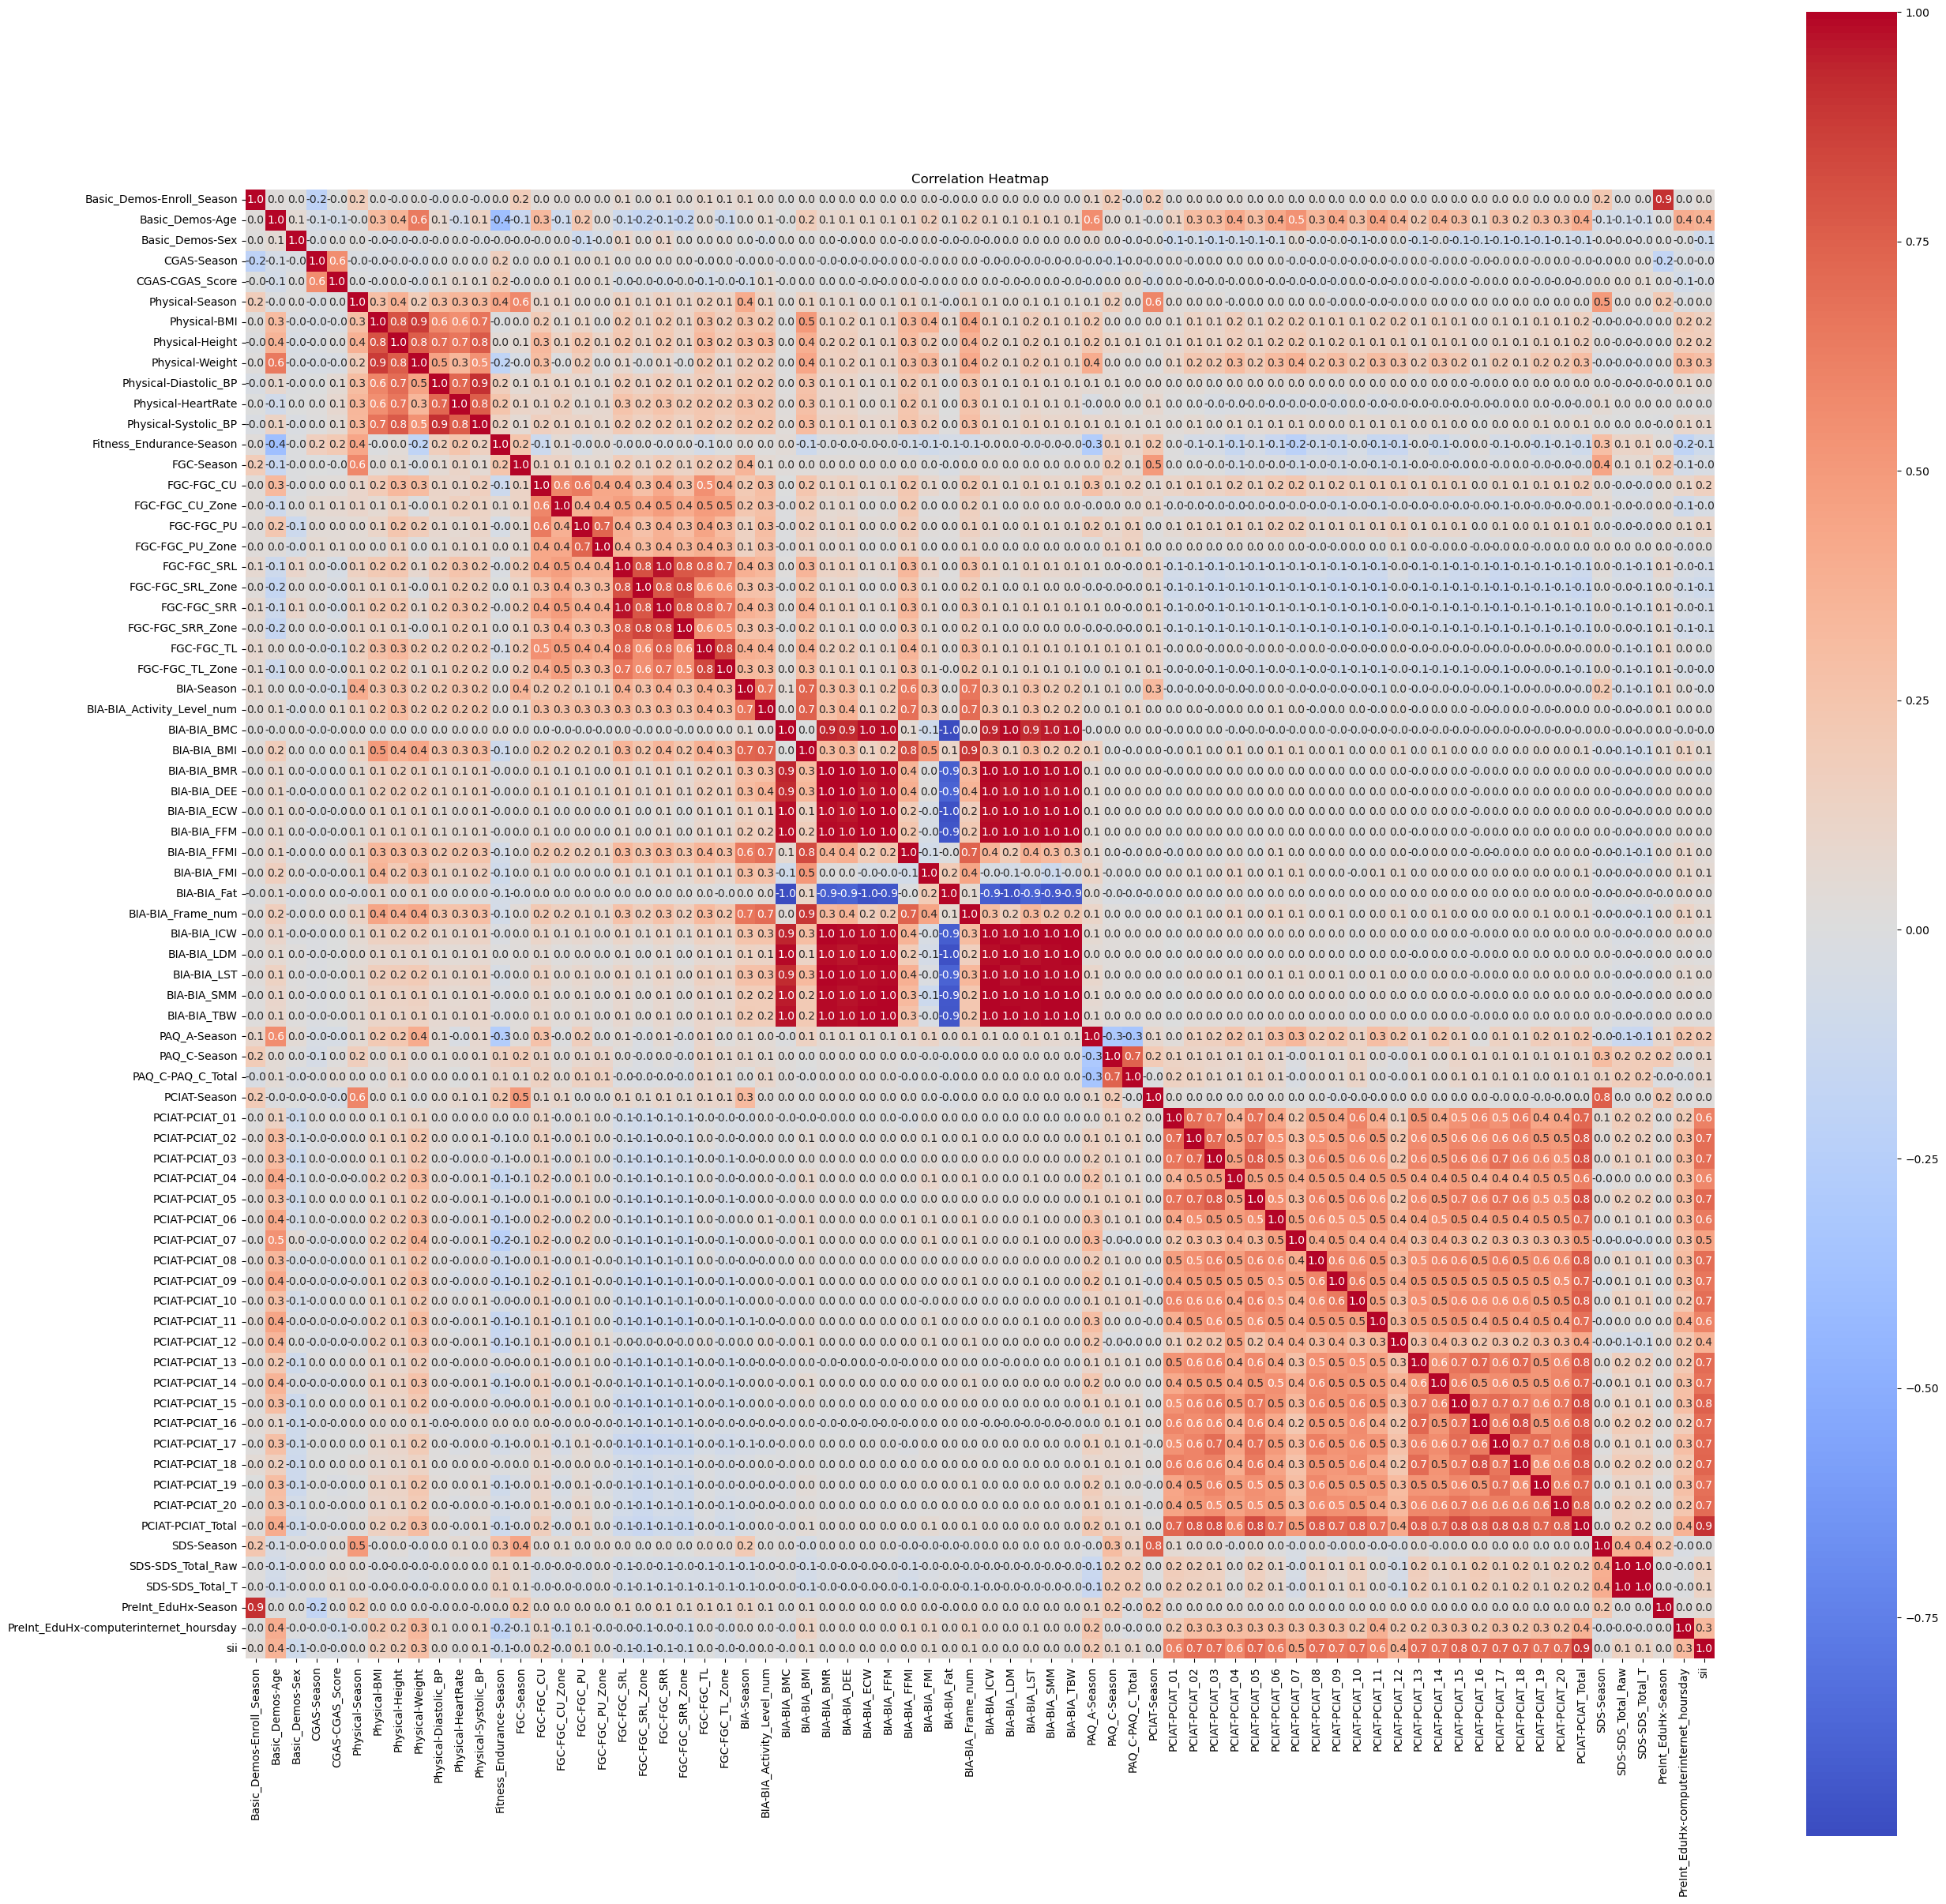

In [67]:
# correlation matrix
correlation_matrix = train_df.corr()

# plot heatmap
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [68]:
# define X and y
X = train_df.iloc[:, :-1]
y = target

print(X.columns)

Index(['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'FGC-Season', 'FGC-FGC_CU',
       'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL',
       'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL',
       'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num',
       'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE',
       'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI',
       'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM',
       'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-Season',
       'PAQ_C-Season', 'PAQ_C-PAQ_C_Total', 'PCIAT-Season', 'PCIAT-PCIAT_01',
       'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05',
       'PCI

In [69]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# random forest model
rf_model = RandomForestClassifier(random_state=80)

# 10-fold cross validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

# fit model
rf_model.fit(X_train, y_train)

Cross-validation scores: [0.99635036 1.         1.         0.99270073 0.99270073 0.99270073
 0.98901099 1.         0.99267399 1.        ]
Mean accuracy: 0.9956137536429507


RandomForestClassifier(random_state=80)

In [75]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       336
         1.0       0.98      1.00      0.99       131
         2.0       1.00      0.97      0.99        72
         3.0       1.00      1.00      1.00         9

    accuracy                           1.00       548
   macro avg       1.00      0.99      0.99       548
weighted avg       1.00      1.00      1.00       548



In [77]:
print('Prediction Accuracy: ', accuracy_score(y_test, y_pred_rf))

Prediction Accuracy:  0.9963503649635036


In [79]:
# precision
rf_precision = precision_score(y_test, y_pred_rf, average='macro')
print(f"Precision: {rf_precision}")

# recall
rf_recall = recall_score(y_test, y_pred_rf, average='macro')
print(f"Recall: {rf_recall}")

# f1 score
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
print(f"F1 Score: {rf_f1}")

# f2 score
rf_f2 = fbeta_score(y_test, y_pred_rf, beta=2, average='macro')
print(f"F2 Score: {rf_f2}")

Precision: 0.9962406015037594
Recall: 0.9930555555555556
F1 Score: 0.9945849338454972
F2 Score: 0.9936523728136187


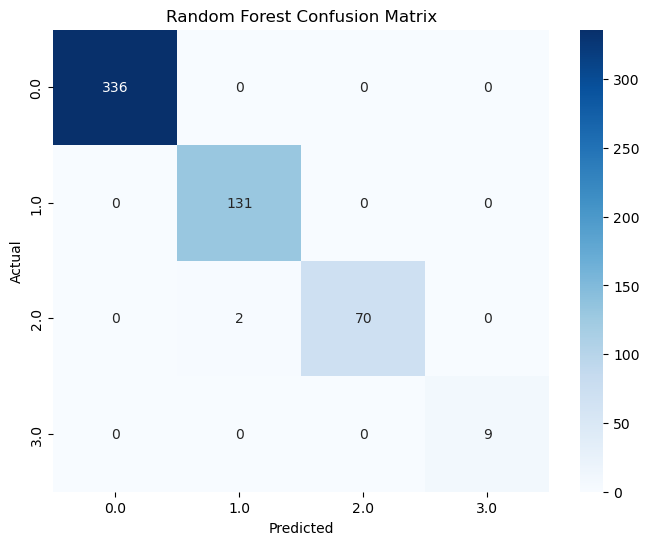

In [81]:
# confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [83]:
# decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# perform 10-fold cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(dt_model, X, y, cv=kfold, scoring='accuracy')

print("Accuracy scores for each fold:", scores)
print("Mean accuracy score:", scores.mean())

# fit model
dt_model.fit(X_train, y_train)

Accuracy scores for each fold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy score: 1.0


DecisionTreeClassifier(random_state=42)

In [85]:
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       336
         1.0       1.00      1.00      1.00       131
         2.0       1.00      1.00      1.00        72
         3.0       1.00      1.00      1.00         9

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548



In [87]:
print('Prediction Accuracy: ', accuracy_score(y_test, y_pred_dt))

Prediction Accuracy:  1.0


In [89]:
# precision
dt_precision = precision_score(y_test, y_pred_dt, average='macro')
print(f"Precision: {dt_precision}")

# recall
dt_recall = recall_score(y_test, y_pred_dt, average='macro')
print(f"Recall: {dt_recall}")

# f1 score
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
print(f"F1 Score: {dt_f1}")

# f2 score
dt_f2 = fbeta_score(y_test, y_pred_dt, beta=2, average='macro')
print(f"F2 Score: {dt_f2}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
F2 Score: 1.0


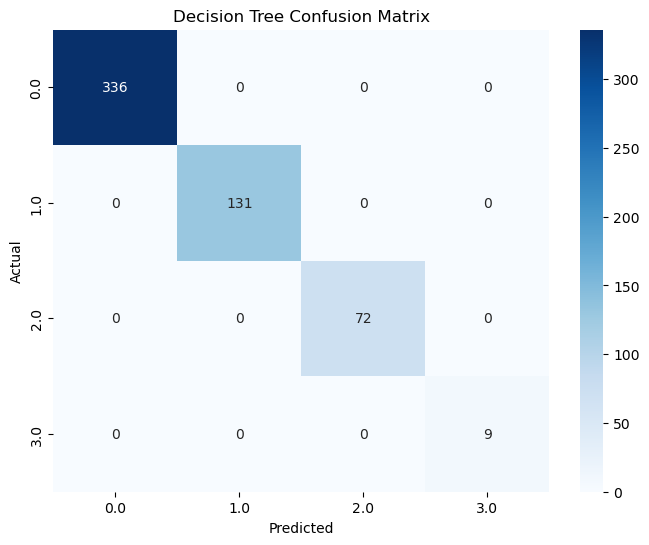

In [91]:
# confusion matrix
dt_cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [93]:
# gradient boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# perform 10-fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_model, X, y, cv=kf, scoring='neg_mean_squared_error')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))

# fit model
gb_model.fit(X_train, y_train)

Cross-validation scores: [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Mean cross-validation score: 0.0
Standard deviation of cross-validation scores: 0.0


GradientBoostingClassifier(random_state=42)

In [94]:
y_pred_gb = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       336
         1.0       1.00      1.00      1.00       131
         2.0       1.00      1.00      1.00        72
         3.0       1.00      1.00      1.00         9

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548



In [95]:
print('Prediction Accuracy: ', accuracy_score(y_test, y_pred_gb))

Prediction Accuracy:  1.0


In [99]:
# precision
gb_precision = precision_score(y_test, y_pred_gb, average='macro')
print(f"Precision: {gb_precision}")

# recall
gb_recall = recall_score(y_test, y_pred_gb, average='macro')
print(f"Recall: {gb_recall}")

# f1 score
gb_f1 = f1_score(y_test, y_pred_gb, average='macro')
print(f"F1 Score: {gb_f1}")

# f2 score
gb_f2 = fbeta_score(y_test, y_pred_gb, beta=2, average='macro')
print(f"F2 Score: {gb_f2}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
F2 Score: 1.0


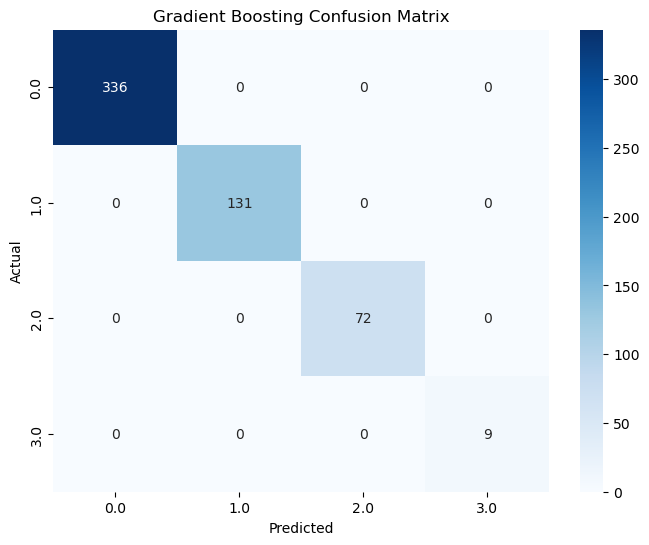

In [101]:
# confusion matrix
gb_cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

In [103]:
# k-nearest-neighbour model
knn_model = KNeighborsClassifier(n_neighbors=3)

# 10-fold cross validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", np.mean(scores))

# fit model
knn_model.fit(X_train, y_train)

Accuracy scores for each fold: [0.67153285 0.71167883 0.71167883 0.72262774 0.63138686 0.64963504
 0.67765568 0.67399267 0.67032967 0.73260073]
Mean accuracy: 0.6853118900564157


KNeighborsClassifier(n_neighbors=3)

In [105]:
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84       336
         1.0       0.50      0.40      0.45       131
         2.0       0.60      0.35      0.44        72
         3.0       0.00      0.00      0.00         9

    accuracy                           0.70       548
   macro avg       0.47      0.42      0.43       548
weighted avg       0.67      0.70      0.68       548



/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
print('Prediction Accuracy: ', accuracy_score(y_test, y_pred_knn))

Prediction Accuracy:  0.7043795620437956


In [109]:
# precision
knn_precision = precision_score(y_test, y_pred_knn, average='macro')
print(f"Precision: {knn_precision}")

# recall
knn_recall = recall_score(y_test, y_pred_knn, average='macro')
print(f"Recall: {knn_recall}")

# f1 score
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
print(f"F1 Score: {knn_f1}")

# f2 score
knn_f2 = fbeta_score(y_test, y_pred_knn, beta=2, average='macro')
print(f"F2 Score: {knn_f2}")

Precision: 0.46562375565080927
Recall: 0.41711726039016117
F1 Score: 0.4305174701459531
F2 Score: 0.42057257990324637


/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


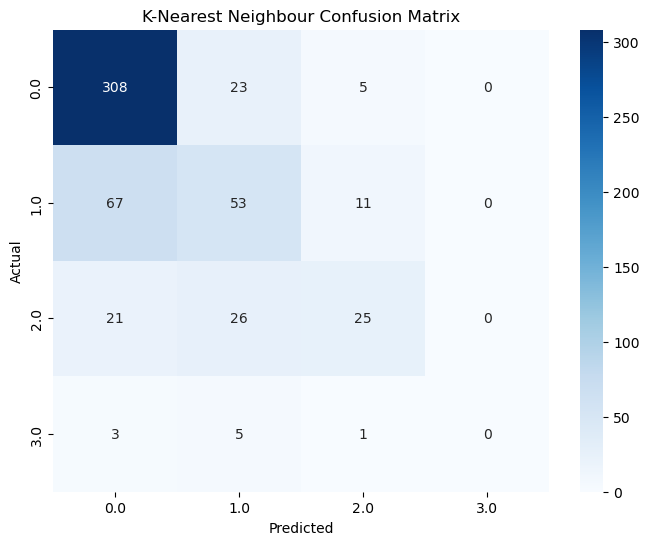

In [111]:
# confusion matrix
knn_cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbour Confusion Matrix')
plt.show()